<a href="https://colab.research.google.com/github/Nahom32/Randomness-Simulation/blob/main/monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Estimation of Pi using Monte Carlo Techniques
---



In [4]:
import numpy

In [5]:
def estimate_pi(N):
  '''
  This function estimates pi from a number of trials using the monte-carlo approaches
  parameters:
  N: number of trials
  returns:
  pi: estimate of pi
  '''
  points_inside = 0
  for i in range(N):
    rand_x = numpy.random.uniform(-1,1)
    rand_y = numpy.random.uniform(-1,1)
    radius = rand_x**2 + rand_y**2
    if radius <= 1:
      points_inside += 1
  return 4*points_inside/N

In [6]:
print(estimate_pi(100))
print(estimate_pi(1000))

3.32
3.184


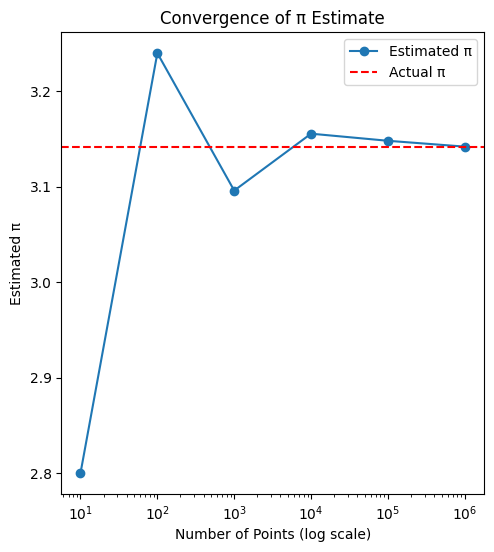

In [7]:
import matplotlib.pyplot as plt
def plot_pi_convergence(arr_of_points):
  """
  This function plots the convergence of pi estimate
  parameters:
  arr_of_points: array of points
  """
  values = list(map(lambda x: estimate_pi(x), arr_of_points))
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(arr_of_points, values, marker='o', label='Estimated π')
  plt.axhline(y=numpy.pi, color='r', linestyle='--', label='Actual π')
  plt.xscale('log')
  plt.xlabel('Number of Points (log scale)')
  plt.ylabel('Estimated π')
  plt.title('Convergence of π Estimate')
  plt.legend()
  plt.show()


plot_pi_convergence([10, 100, 1000, 10000, 100000, 1000000])



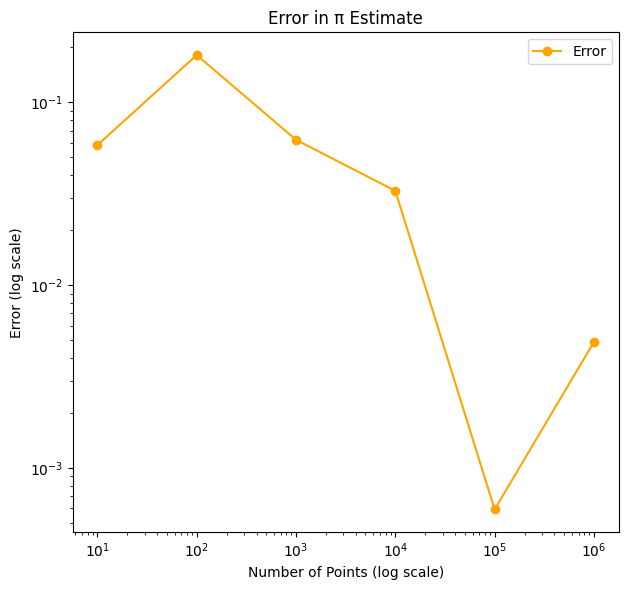

In [8]:
def plot_pi_error_convergence(arr_of_points):
  """
  This function plots the convergence of pi estimate error with estimated versus
  the actual pi value.
  parameters:
  arr_of_points: array of points
  """
  values_error = list(map(lambda x: numpy.abs(estimate_pi(x)-numpy.pi), arr_of_points))
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 2)
  plt.plot(arr_of_points, values_error, marker='o', color='orange', label='Error')
  plt.xscale('log')
  plt.yscale('log')
  plt.xlabel('Number of Points (log scale)')
  plt.ylabel('Error (log scale)')
  plt.title('Error in π Estimate')
  plt.legend()

  plt.tight_layout()
  plt.show()

plot_pi_error_convergence([10, 100, 1000, 10000, 100000, 1000000])


# Task 2: Integral Estimation

In [9]:
def integral(f, lower, upper, n):
  '''
  This function finds the integral of a given function using the summation method.
  parameters:
  f: function
  lower: lower bound
  upper: upper bound
  n: number of estimates
  returns:
  integral_estimate: estimate of the integral
  '''
  samples = numpy.random.uniform(lower, upper, n)
  function_values = f(samples)
  integral_estimate = (lower - upper) * numpy.mean(function_values)
  return integral_estimate
def f(x):
  return numpy.exp(-x**2)



In [15]:
print(integral(f,1,0,100000))

0.7473124392299775


In [27]:
def monte_carlo_integration(f, bounds, N):
    """
    Estimate the integral of a function f over a multidimensional domain using Monte Carlo methods.

    Parameters:
        f (function): The function to integrate.
        bounds (list of tuples): The bounds for each dimension as [(a1, b1), (a2, b2), ...].
        N (int): The number of random samples.

    Returns:
        float: The estimated integral value.
    """




    samples = numpy.array([
        numpy.random.uniform(i[0], i[1], N) for i in bounds
    ]).T


    calculated_values = f(samples[0],samples[1])
    domain_volume = numpy.prod([b - a for (a, b) in bounds])


    integral_estimate = domain_volume * numpy.mean(calculated_values)
    return integral_estimate, numpy.std(calculated_values)


In [12]:
def y(x, y):
    return numpy.exp(-(x**2 + y**2))


In [20]:
def plot_integral_convergence(arr_of_points):
  """
  This function plots the convergence of integral of exp(-x^2) estimate
  with a calculated value without the monte carlo method.
  parameters:
  arr_of_points: array of points
  """
  values = list(map(lambda freq: integral(f,1,0,freq), arr_of_points))
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(arr_of_points, values, marker='o', label='Estimated monte-carlo integral')
  plt.axhline(y=0.7468, color='r', linestyle='--', label='calculated value')
  plt.xscale('log')
  plt.xlabel('Number of Points (log scale)')
  plt.ylabel('Estimated integral')
  plt.title('Convergence of integral Estimate')
  plt.legend()
  plt.show()

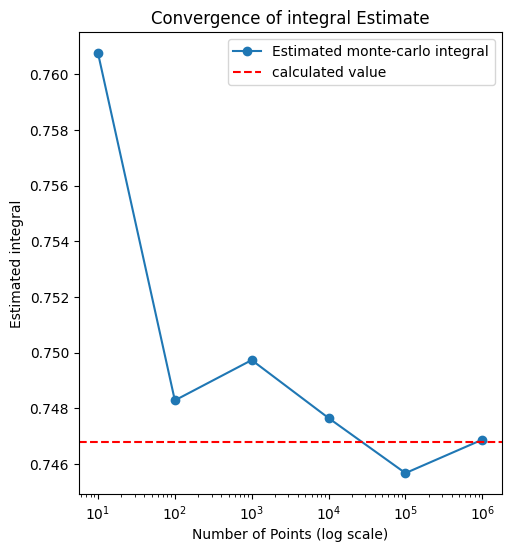

In [21]:
plot_integral_convergence([10, 100, 1000, 10000, 100000, 1000000])

#Task 3

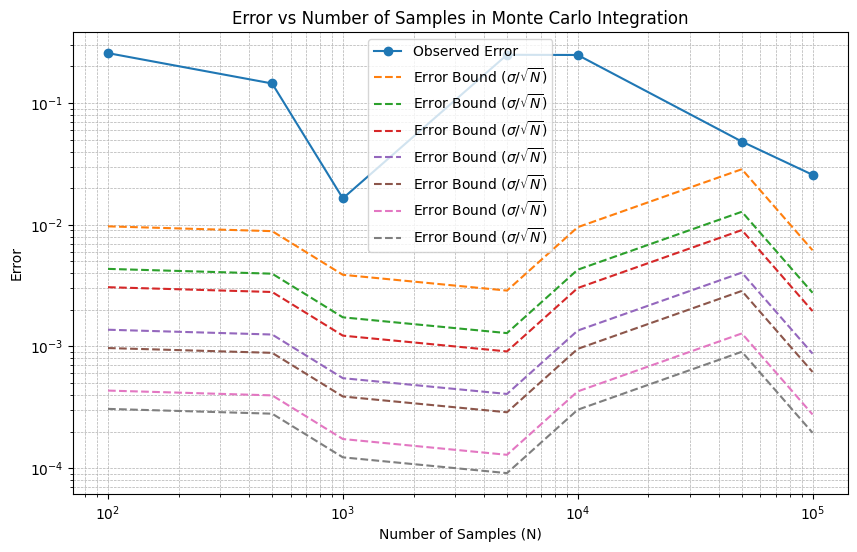

In [31]:
N_values = [100, 500, 1000, 5000, 10000, 50000, 100000]
true_value = 0.5577462851  #a calculated approximated value
bounds = [(0, 1), (0, 1)]
# for N in N_values:
#     estimate, std_dev = monte_carlo_integration(f, bounds, N)
#     error = abs(estimate - true_value)
#     errors.append(error)
#     error_bound = std_dev / numpy.sqrt(N)
#     error_bounds.append(error_bound)
estimates = list(map(lambda N: monte_carlo_integration(y, bounds, N), N_values))
errors = list(map(lambda x: abs(x[0] - true_value), estimates))
error_bounds = list(map(lambda x: x[1] / numpy.sqrt(N_values), estimates))

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(N_values, errors, label="Observed Error", marker="o")
plt.loglog(N_values, error_bounds, label="Error Bound ($\sigma/\sqrt{N}$)", linestyle="--")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Error")
plt.title("Error vs Number of Samples in Monte Carlo Integration")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()